In [1]:
import numpy as np
import matplotlib.pyplot as plt

Brug den styrende ligning til at lave central/forward/backward difference approximations
$$
    \int\dfrac{d}{dx}\left( \dfrac{dT}{dx} \right)dx + S_u = 0.
$$

$S_u$ finded ved at tage
$$
    S_u=\int S dV = \bar{S}\Delta V = S \delta x A
$$

Opstil lineære ligninger for at lave matrice system
\begin{align}
    \begin{bmatrix}
        \dfrac{3kA}{\delta x} & \dfrac{-kA}{\delta x} & 0                     & \cdots                & 0                     \\
        \dfrac{-kA}{\delta x} & \dfrac{2kA}{\delta x} & \dfrac{-kA}{\delta x} & \cdots                & 0                     \\
        \vdots                & \dfrac{-kA}{\delta x} & \dfrac{2kA}{\delta x} & \dfrac{-kA}{\delta x} & \vdots                \\
        \vdots                & \ddots                & \ddots                & \ddots                & \vdots                \\
        0                     & \cdots                & 0                     & \dfrac{-kA}{\delta x} & \dfrac{3kA}{\delta x}
    \end{bmatrix} \begin{bmatrix}
        T_1 \\
        \vdots \\
        \vdots \\
        \vdots \\
        \vdots \\
        T_n
    \end{bmatrix} = \begin{bmatrix}
        \frac{2kA}{\delta x}T_A + S_u \\
        S_u \\
        \vdots \\
        \vdots \\
        \vdots \\
        S_u \\
        \frac{2kA}{\delta x}T_b + S_u
    \end{bmatrix}
\end{align}

In [2]:
TA = 100
TB = 200
n = 100
t = 0.02
S = 1000
k = 0.5
A = 1


dx = t/n
x = np.linspace(0,t,n)
Su = S*dx*A

In [3]:
K = np.zeros((n,n))
coef1 = (3*k*A)/dx
coef2 = -(k*A)/dx
coef3 = (2*k*A)/dx

In [4]:
K[0, 0] = coef1
K[-1, -1] = coef1
K[1:-1, 1:-1][np.diag_indices_from(K[1:-1, 1:-1])] =  coef3
K[1:, :-1][np.diag_indices_from(K[1:, :-1])] = coef2
K[:-1, 1:][np.diag_indices_from(K[:-1, 1:])] = coef2

Q = np.zeros(n) + Su
Q[0] += coef3*TA
Q[-1] += coef3*TB

T = np.linalg.solve(K,Q)

In [5]:
# exact sol
def analytical_T(TA,TB,S,k,t,linspace):
    return ((TB-TA)/t+(S/(2*k))*(t-x))*x+TA

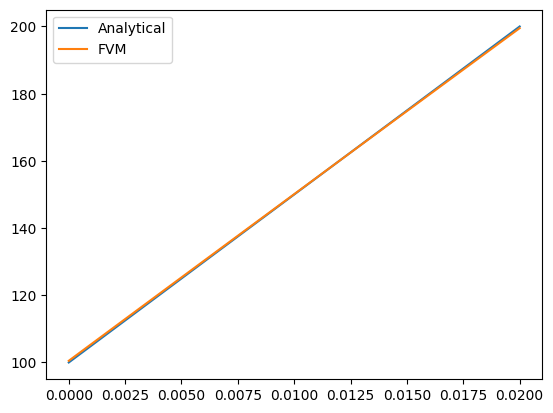

In [6]:
plt.plot(x, analytical_T(TA,TB,Su,k,t,x), label="Analytical")
plt.plot(x, T, label="FVM")
plt.legend()
plt.show()